# 4-1. 가우시안 분포(Gaussian Distribution)

확률 이론에서 **가우시안 (또는 정규) 분포**는 매우 일반적인 연속 확률 분포입니다. 정규 분포는 통계에서 중요하며, 분포가 알려지지 않은 실제 값의 랜덤 변수를 나타내기 위해 자연 및 사회 과학에서 종종 사용됩니다. 

#### 단변량 가우시안 확률밀도 함수

$$ f(x)= { 1 \over \sqrt{2 \pi} \sigma } e^{ -{1 \over 2} \left({x-\mu \over \sigma}\right)^2} = { 1 \over \sqrt{2 \pi} \sigma } \exp \left[-{1 \over 2} \left({x-\mu \over \sigma}\right)^2\right] $$

여기에서 $\sigma$ 는 표준편차를, $\mu$는 기대값을, exp[ ] 는 Euler's number : $e = 2.7182818284\cdots$ 의 지수함수$e^{[ ]}$를 각각 나타낸다.

가우시안 분포는 정규분포(Normal distribution)이라고도 하며, $\mathscr{N}(\mu,\sigma^2)$ 로 표기하기도 한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg" width=500>

$$ f(x;\mu=0, \sigma^2=1) = { 1 \over \sqrt{2 \pi} 1 } \exp \left[-{1 \over 2} \left({x \over 1}\right)^2\right] = \mathscr{N}(\mu=0, \sigma^2=1)$$

$$ f(x;\mu=0, \sigma^2=4) = { 1 \over \sqrt{2 \pi} 2 } \exp \left[-{1 \over 2} \left({x \over 2}\right)^2\right] = \mathscr{N}(\mu=0, \sigma^2=4)$$

$$ f(x;\mu=2, \sigma^2=9) = { 1 \over \sqrt{2 \pi} 3 } \exp \left[-{1 \over 2} \left({x-2 \over 3}\right)^2\right] = \mathscr{N}(\mu=2, \sigma^2=9)$$

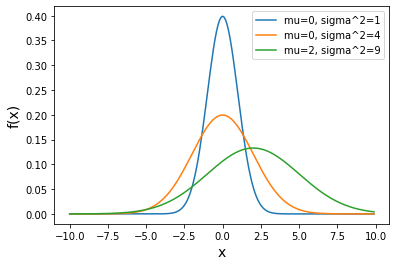

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def np_gaussian_pdf(domain, mu, sigma2, sample=0.2):
  X = np.arange(-domain, domain, sample)
  sigma = np.sqrt(sigma2)
  Z = ((1. /(sigma * np.sqrt(2 * np.pi))) * np.exp(-.5*((X-mu)/sigma)**2))
  return X, Z

plt.plot(*np_gaussian_pdf(10,  0, 1, 0.1), label="mu=0, sigma^2=1")
plt.plot(*np_gaussian_pdf(10,  0, 4, 0.1), label="mu=0, sigma^2=4")
plt.plot(*np_gaussian_pdf(10,  2, 9, 0.1), label="mu=2, sigma^2=9")

plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.legend()

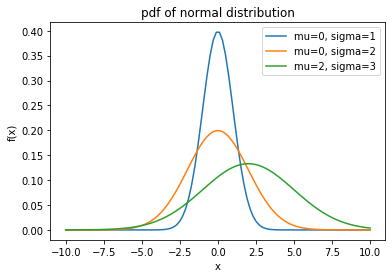

In [11]:
import scipy as sp
from scipy import stats

xx = np.linspace(-10, 10, 100)
mu = 0
std = 1
rv = sp.stats.norm(mu, std)   # **.norm(기대값, 표준편차)
plt.plot(xx, rv.pdf(xx), label="mu=0, sigma=1")
rv = sp.stats.norm(0, 2)
plt.plot(xx, rv.pdf(xx), label="mu=0, sigma=2")
rv = sp.stats.norm(2, 3)
plt.plot(xx, rv.pdf(xx), label="mu=2, sigma=3")
plt.xlabel('x')
plt.ylabel("f(x)")
plt.title("pdf of normal distribution")
plt.legend()
plt.show()

### 다변량 가우시안 확률밀도 함수
D 차원 다변량 가우시안 정규 분포(MVN: multivariate Gaussian normal distribution)의 확률밀도함수는 평균 벡터 $\mu$ 와 공분산 행렬 $\Sigma$ 라는 두 개의 모수를 가지며 다음과 같은 수식으로 정의된다.

$$ \mathscr{N}(\mathbf{x};\mu, \Sigma) = { 1 \over(2 \pi)^{D/2} | \Sigma |^{1/2} } \exp \left[-{1 \over 2} (\mathbf{x} -\mathbf{\mu})^T \Sigma^{-1} (\mathbf{x}-\mathbf{\mu}) \right]$$

이 식에서 각 기호의 의미는 다음과 같다.

* $\mathbf{x} \in \mathbf{R}^D $ : 확률 변수 벡터
* $\mathbf{\mu} \in \mathbf{R}^D $ : 평균 벡터
* $\Sigma \in \mathbf{R}^{D\times D} $ : 공분산 행렬
* $\Sigma^{-1} = \Lambda \in \mathbf{R}^{D\times D} $ : 공분산행렬의 역행렬 (정밀도 행렬(precision matrix))

다변량 가우시안 정규분포에서 공분산 행렬은 일반적으로 양의 정부호 대칭행렬(positive definite symmetric matrix)만 다룬다.

$$ f\left( \begin{bmatrix} x_1 \\ x_2 \end{bmatrix};
\mu=\begin{bmatrix} 1 \\ 2 \end{bmatrix},
\Sigma = \begin{bmatrix} 2 & 0 \\ 0 & 4 \end{bmatrix}
\right) = { 1 \over \sqrt{(2 \pi)^2} \sqrt{8} } \exp 
\left[-{1 \over 2} [ x_1-1, x_2-2] 
\begin{bmatrix} 0.5 & 0 \\ 0 & 0.25 \end{bmatrix}
\begin{bmatrix} x_1-1 \\ x_2-2 \end{bmatrix}
\right]$$


$$ f\left( \begin{bmatrix} x_1 \\ x_2 \end{bmatrix};
\mu=\begin{bmatrix} 5 \\ 9 \end{bmatrix},
\Sigma = \begin{bmatrix} 1 & 2 \\ 2 & 8 \end{bmatrix}
\right) = { 1 \over \sqrt{(2 \pi)^2} 2 } \exp 
\left[-{1 \over 2} [ x_1-5, x_2-9] 
\begin{bmatrix} 2 & 0.5 \\ 0.5 & 0.25 \end{bmatrix}
\begin{bmatrix} x_1-5 \\ x_2-9 \end{bmatrix}
\right]$$

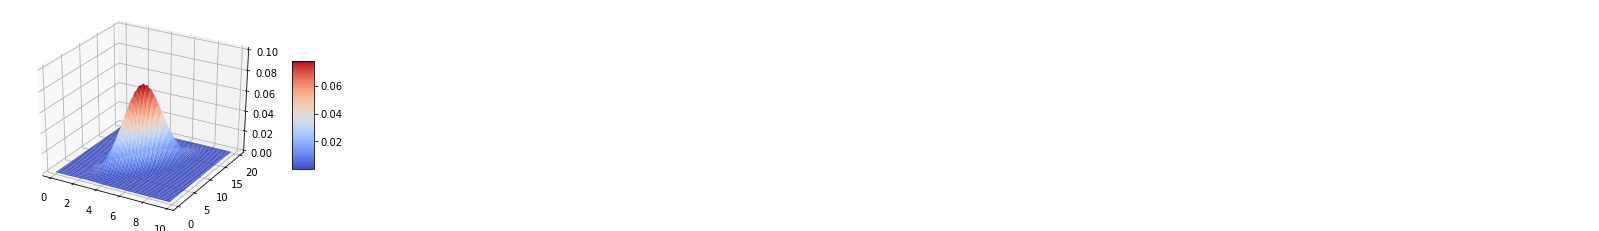

In [51]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

# Make data.
X = np.arange(0, 10, 0.2)
Y = np.arange(0, 20, 0.2)
X, Y = np.meshgrid(X, Y)

mu = [5, 9]
cov = [[1, 2], [2, 8]]
rv = sp.stats.multivariate_normal(mu, cov)
Z = rv.pdf(np.dstack([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm') 
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

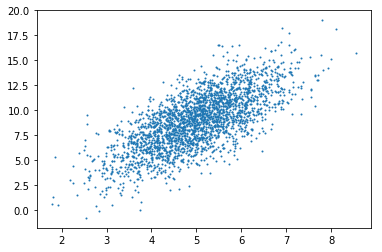

In [71]:
mu = [5, 9]
cov = [[1, 2], [2, 8]]
x = np.random.multivariate_normal(mu, cov, (50,50))
plt.scatter(x[:,:,0], x[:,:,1], s=1)
plt.show()

#### 가우시안 분포가 자주 사용되는 이유

* 1차원의 특징 벡터일 경우에는 두 개의 파라미터, 평균과 표준편차 $(\mu,\sigma)$ 만으로도 확률분포를 특징 짖기에 충분함.
* 중심 극한 정리 (Central Limit Theorem)로 인하여 매우 유용한 분포임. 

**중심 극한 정리 (central Limit Theorem)** : 평균 $\mu$ 와 분산 $\sigma^2$ 를 갖는 경우 평균의 표본
분포는 표본의 크기($N$)가 증가함에 따라, 평균 $\mu$ 와 분산 $\sigma^2 /N$을 갖는 정규분포로 접근한다. 

균등 분포(uniform distribution) (연속 확률 분포의 한 가지로 주어진 구간 내의 모든 점에 대해 동일한 확률을 가지는 분포를 의미한다.) 의 자료로부터 500번의 실험을 수행한 경우 
* N=1 : 분포로부터 하나의 표본을 추출하고 그의 평균을 기록 ( 히스토그램은 일정한 밀도를 보임)
* N=4 : 분포로부터 4개의 표본을 추출하고 그의 평균을 기록 (히스토그램은 가우시안 분포를 보이
기 시작함)
* N=7 그리고 N=10 경우도 마찬가지임.
* N이 증가함에 따라서 히스토그램의 모양이 점점 더 정규분포를 닮아 간다.

<img src="images/central_limit_theorem.png" width="300">

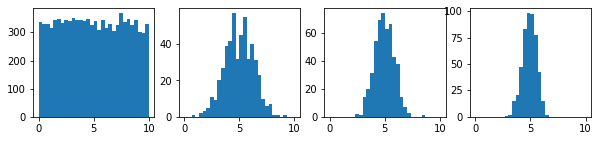

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random

s = np.random.uniform(low=0, high=10, size=10000)
bins = 30
ranges = (0,10)

fig, axes = plt.subplots(1,4, figsize=(10,2))
axes[0].hist(s,bins,ranges)
samples = [ np.mean(random.choices(s,k=5)) for _ in range(500) ]
axes[1].hist(samples,bins,ranges)
samples = [ np.mean(random.choices(s,k=10)) for _ in range(500) ]
axes[2].hist(samples,bins,ranges)
samples = [ np.mean(random.choices(s,k=20)) for _ in range(500) ]
axes[3].hist(samples,bins,ranges)
plt.show()

**다변량 가우시안 분포의 예 (구형 공분산)**

2차원($D=2$) 다변량 정규분포의 예를 몇가지 살펴보자. 
우선 2차원이므로 확률 변수 벡터는 
$$ 
x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}
$$
이다.

만약
$$ 
\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} 
$$

이면 

$$ 
| \Sigma| = 1. \;\;\;
\Sigma^{-1} = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}
$$

$$ 
(x-\mu)^T \Sigma^{-1} (x-\mu) =  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} 
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix}
=
(x_1 - 2)^2 + (x_2 - 3)^2
$$

$$
\mathcal{N}(x_1, x_2) = \dfrac{1}{2\pi}
\exp \left( -\dfrac{1}{2} \left( (x_1 - 2)^2 + (x_2 - 3)^2 \right) \right)
$$

이 확률밀도함수의 모양은 다음과 같다.
SciPy 의 stats 서브패키지에는 다변량 정규분포를 위한 `multivariate_normal` 명령이 있다. `mean` 인수로 평균 벡터를, `cov` 인수로 공분산 행렬을 받는다.

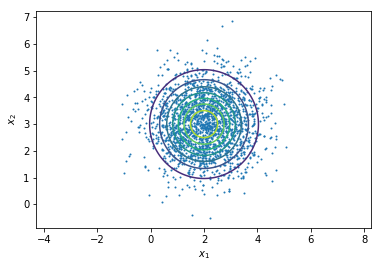

In [74]:
mu = [2, 3]
cov = [[1, 0], [0, 1]]

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(2000)

xx = np.linspace(-1, 5, 120)
yy = np.linspace(-0, 6, 120)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")       #plt.xlim(-1, 5); plt.ylim(0, 6)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

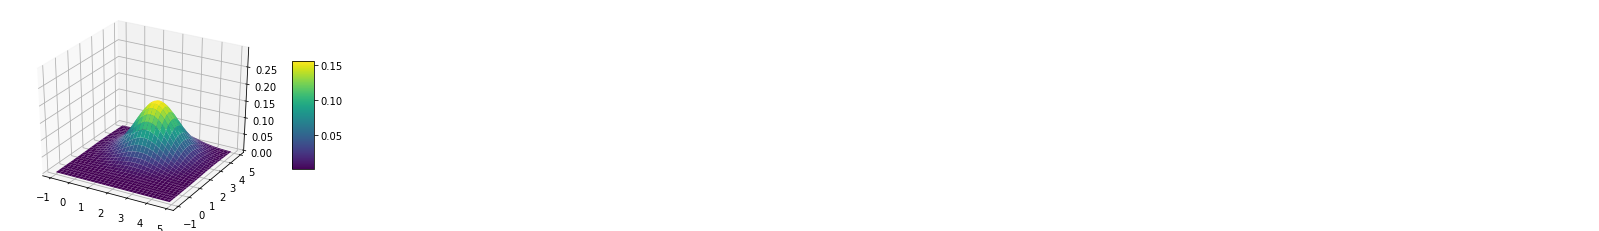

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Make data.
X = np.arange(-1, 5, 0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)

mu = [2, 3]
cov = [[1, 0], [0, 1]]
rv = sp.stats.multivariate_normal(mu, cov)
Z = rv.pdf(np.dstack([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='viridis') 
ax.set_zlim(0, 0.3)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

**다변량 가우시안 분포의 예 (대각 공분산)**

만약
$$ 
\mu = \begin{bmatrix}0 \\ 0 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}4 & 0 \\ 0 & 1 \end{bmatrix} 
$$

이면 
$$ 
|\Sigma| = 4,\;\;\;
\Sigma^{-1} = \begin{bmatrix}0.25 & 0 \\ 0 & 1 \end{bmatrix}
$$

$$ 
(x-\mu)^T \Sigma^{-1} (x-\mu) =  
\begin{bmatrix}x_1  & x_2 \end{bmatrix}
\begin{bmatrix}0.25 & 0\\ 0 & 1\end{bmatrix}
\begin{bmatrix}x_1  \\ x_2  \end{bmatrix}
=
\dfrac{1}{10}\left(0.25  x_1^2 + x_2^2\right)
$$

$$
\mathcal{N}(x_1, x_2) = \dfrac{1}{4\pi}
\exp \left( -\dfrac{1}{20}\left(0.25  x_1^2 + x_2^2\right) \right)
$$

이 확률밀도함수의 모양은 다음과 같다.

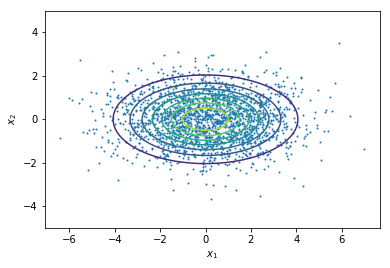

In [78]:
mu = [0, 0]
cov = [[4, 0], [0, 1]]

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(2000)

xx = np.linspace(-5, 5, 120)
yy = np.linspace(-5, 5, 120)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

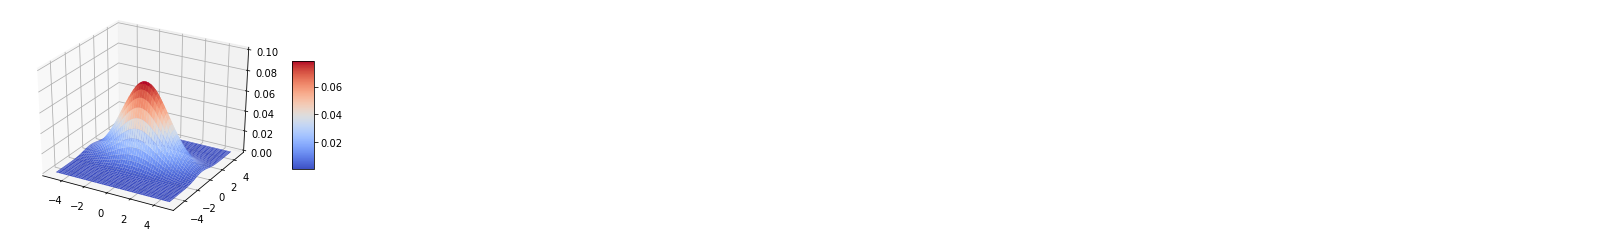

In [55]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

mu = [0, 0]
cov = [[4, 0], [0, 1]]
rv = sp.stats.multivariate_normal(mu, cov)
Z = rv.pdf(np.dstack([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')

# Customize the z axis.
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

**다변량 가우시안 분포의 예 (완전 공분산)**

만약
$$ 
\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}2 & 3 \\ 3 & 7 \end{bmatrix} 
$$

이면 
$$ 
|\Sigma| = 5,\;\;\;
\Sigma^{-1} = \begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4 \end{bmatrix}
$$

$$ 
(x-\mu)^T \Sigma^{-1} (x-\mu) =  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4\end{bmatrix}
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix}
=
\dfrac{1}{10}\left(14(x_1 - 2)^2 - 12(x_1 - 2)(x_2 - 3) + 4(x_2 - 3)^2\right)
$$

$$
\mathcal{N}(x_1, x_2) = \dfrac{1}{2\sqrt{5}\pi}
\exp \left( -\dfrac{1}{10}\left(7(x_1 - 2)^2 - 6(x_1 - 2)(x_2 - 3) + 2(x_2 - 3)^2\right) \right)
$$

이 확률밀도함수의 모양은 다음과 같다.

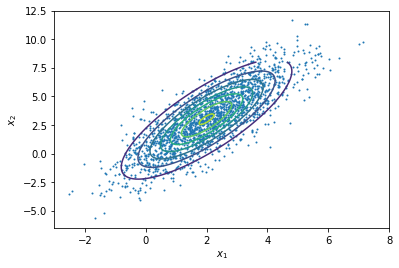

In [77]:
mu = [2, 3]
cov = [[2, 3], [3, 7]]

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(2000)

xx = np.linspace(-3, 8, 120)
yy = np.linspace(-3, 8, 120)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

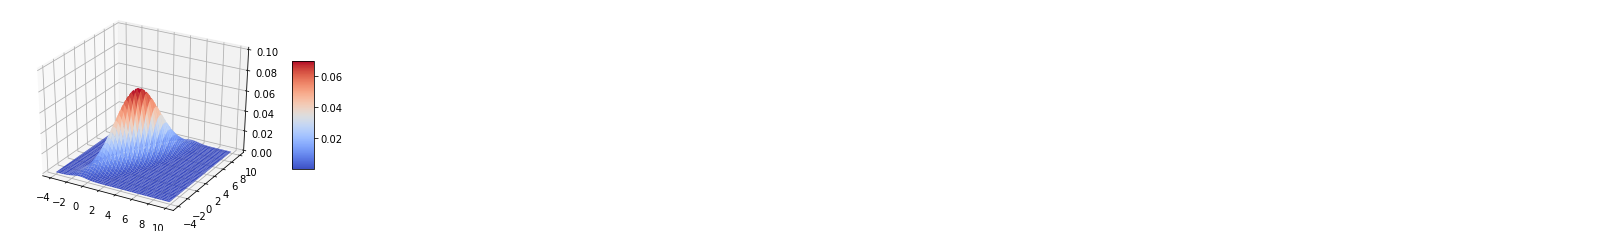

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-4, 10, 0.1)
Y = np.arange(-4, 10, 0.1)
X, Y = np.meshgrid(X, Y)

mu = [2, 3]
cov = [[2, 3], [3, 7]]
rv = sp.stats.multivariate_normal(mu, cov)
Z = rv.pdf(np.dstack([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')

# Customize the z axis.
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()